In [1]:
#!pip install gapminder

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from gapminder import gapminder

- `numpy` – biblioteka do pracy z macierzami i wektorami, ale nie tylko (sporo funkcji matematycznych, generowanie danych z rozkładu itp.)
- `matplotlib` - biblioteka do tworzenia wizualizacji, w szczególności wykresów
- `pyplot` - moduł biblioteki `matplotlib`, służy do tworzenia wykresów w konwencji przypominającej MATLABową. 

In [3]:
x = [1, 2, 3, 4, 5]
y = [a*a for a in x]



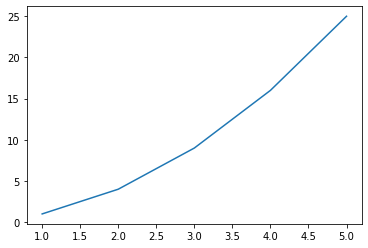

In [4]:
# wykres liniowy

plt.plot(x, y)
plt.show()

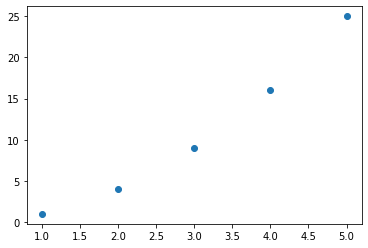

In [5]:
# wykres punktowy

plt.scatter(x, y)
plt.show()

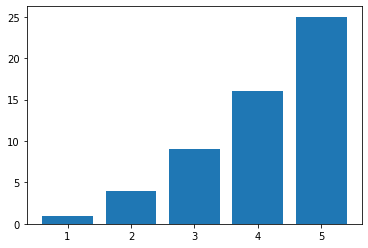

In [6]:
# wykres słupkowy

plt.bar(x, y)
plt.show()

# Dane gapminder

In [7]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


No handles with labels found to put in legend.


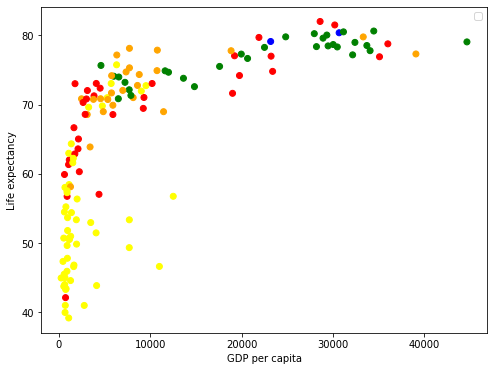

In [8]:
gapminder_2002 = gapminder[gapminder['year'] == 2002]

colormap = {
    'Asia': 'red',
    'Africa': 'yellow',
    'Europe': 'green',
    'Americas': 'orange',
    'Oceania': 'blue'    
}

plt.figure(figsize=(8, 6))



plt.scatter(
    gapminder_2002['gdpPercap'],
    gapminder_2002['lifeExp'],
    c = gapminder_2002['continent'].map(colormap)
)

plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')

plt.legend()

plt.show()

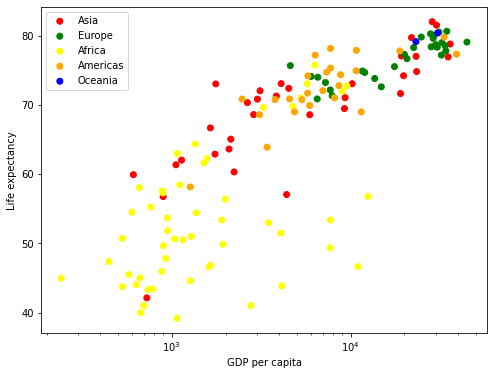

In [9]:
# trochę lepiej

continents = gapminder_2002['continent'].unique()

colormap = {
    'Asia': 'red',
    'Africa': 'yellow',
    'Europe': 'green',
    'Americas': 'orange',
    'Oceania': 'blue'    
}


plt.figure(figsize=(8, 6))

for c in continents:
    gapminder_2002_select = gapminder_2002[gapminder_2002['continent'] == c]
    
    plt.scatter(
        gapminder_2002_select['gdpPercap'],
        gapminder_2002_select['lifeExp'],
        c = gapminder_2002_select['continent'].map(colormap),
        label=c
    )
    
plt.legend()

plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')

plt.xscale('log')


plt.show()

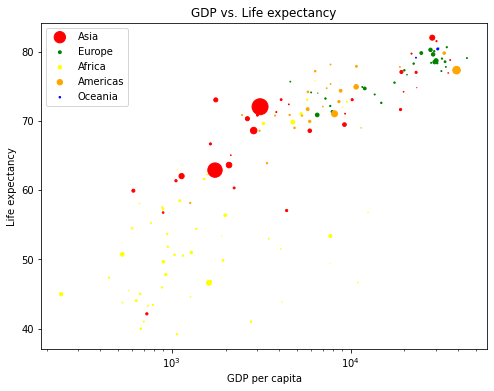

In [10]:
# jeszcze trochę lepiej

# trochę lepiej

continents = gapminder_2002['continent'].unique()

colormap = {
    'Asia': 'red',
    'Africa': 'yellow',
    'Europe': 'green',
    'Americas': 'orange',
    'Oceania': 'blue'    
}


plt.figure(figsize=(8, 6))

for c in continents:
    gapminder_2002_select = gapminder_2002[gapminder_2002['continent'] == c]
    
    plt.scatter(
        gapminder_2002_select['gdpPercap'],
        gapminder_2002_select['lifeExp'],
        c = gapminder_2002_select['continent'].map(colormap),
        s = gapminder_2002_select['pop']/5e6,
        label=c
    )
    
plt.legend()


plt.title('GDP vs. Life expectancy')
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy')

plt.xscale('log')


plt.show()

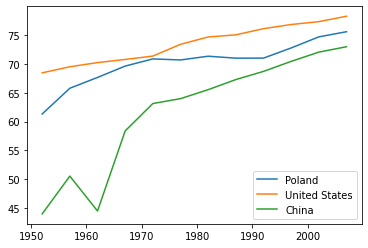

In [11]:
# lifeExp w Polsce, USA i Chinak w kolejnych latach (wykres liniowy)


years = gapminder['year'].unique()


lifeExp_PL = list(gapminder[gapminder['country'] == 'Poland']['lifeExp'])
lifeExp_US = list(gapminder[gapminder['country'] == 'United States']['lifeExp'])
lifeExp_CH = list(gapminder[gapminder['country'] == 'China']['lifeExp'])


plt.plot(years, lifeExp_PL, label = 'Poland')
plt.plot(years, lifeExp_US, label = 'United States')
plt.plot(years, lifeExp_CH, label = 'China')

plt.legend()
plt.show()

## Praca z danymi dotyczących imion dzieci w Polsce

In [12]:
DATA_URL = 'https://api.dane.gov.pl/media/resources/20190822/IMIONA_ur_01.01.2019-30.06.2019.xlsx'

names = pd.read_excel(DATA_URL)

In [13]:
names['Pierwsza_litera'] = names['Imię'].str[:1]

In [14]:
names

,Imię,Liczba,Płeć,Pierwsza_litera
0,ANTONI,4247,M,A
1,JAKUB,4050,M,J
2,JAN,3979,M,J
3,SZYMON,3584,M,S
4,ALEKSANDER,3582,M,A
...,...,...,...,...
1088,YASMINE,2,K,Y
1089,YELYZAVETA,2,K,Y
1090,YOANNA,2,K,Y
1091,ZOLA,2,K,Z


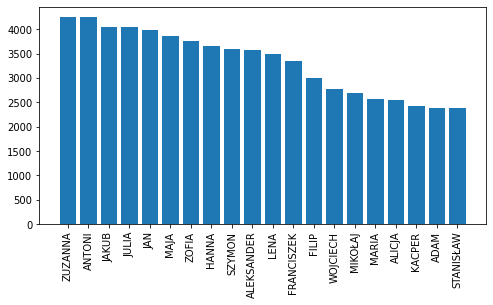

In [15]:
# Najpopularniejsze imiona (20)


most_popular = names.sort_values('Liczba', ascending=False)[:20]



plt.figure(figsize=(8, 4))
plt.bar(
    most_popular['Imię'],
    most_popular['Liczba'],
)

plt.xticks(rotation='vertical')
plt.show()

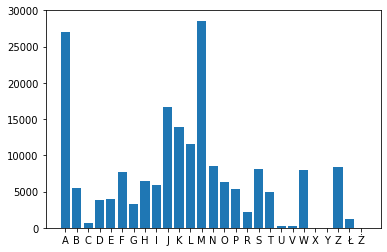

In [16]:
# Ile imion zaczyna się na daną literę?

names_grouped = names.groupby('Pierwsza_litera')\
                        .sum()['Liczba']\
                        .reset_index()

plt.bar(
    names_grouped['Pierwsza_litera'],
    names_grouped['Liczba']
)

plt.show()

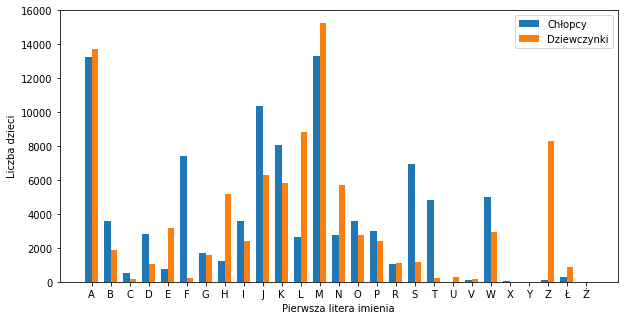

In [17]:
# Ile imion zaczyna się na daną literę wśród chłopców, a ile wśród dziewczynek?

names_grouped_M = names[names['Płeć'] == 'M'].groupby('Pierwsza_litera')\
                        .sum()['Liczba']\
                        .reset_index()

names_grouped_F = names[names['Płeć'] == 'K'].groupby('Pierwsza_litera')\
                        .sum()['Liczba']\
                        .reset_index()

all_letters = list(names_grouped['Pierwsza_litera'].unique())

n_boy_names = []
for letter in all_letters:
    if names_grouped_M[names_grouped_M['Pierwsza_litera'] == letter]['Liczba'].shape != (0,):
        n = names_grouped_M[names_grouped_M['Pierwsza_litera'] == letter]['Liczba'].values[0]
    else:
        n = 0
    n_boy_names.append(n)

n_girl_names = []
for letter in all_letters:
    if names_grouped_F[names_grouped_F['Pierwsza_litera'] == letter]['Liczba'].shape != (0,):
        n = names_grouped_F[names_grouped_F['Pierwsza_litera'] == letter]['Liczba'].values[0]
    else:
        n = 0
    n_girl_names.append(n)


x = np.arange(len(all_letters))

width = 0.35

plt.figure(figsize=(10, 5))

plt.bar(
    x - width/2,
    n_boy_names,
    width,
    label='Chłopcy'
)

plt.bar(
    x + width/2,
    n_girl_names,
    width,
    label='Dziewczynki'
)

ax = plt.gca()

ax.set_xticks(x)
ax.set_xticklabels(all_letters)

plt.xlabel('Pierwsza litera imienia')
plt.ylabel('Liczba dzieci')

plt.legend()

plt.show()

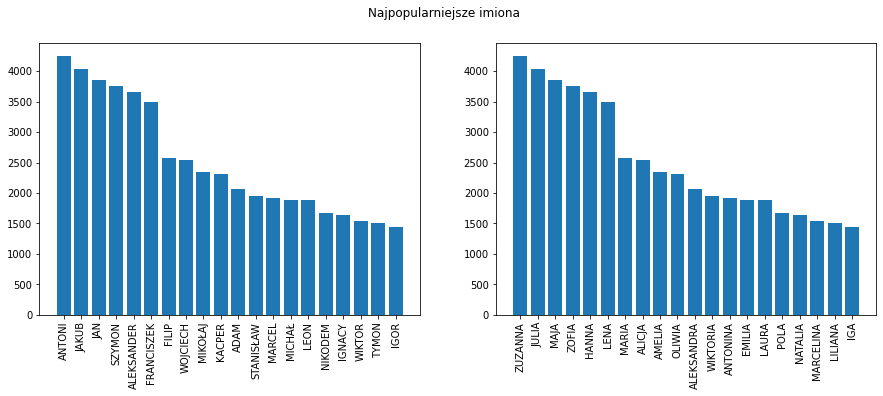

In [18]:
# Najpopularniejsze imiona wśród dziewczynek i chłopców (20)

most_popular_M = names[names['Płeć'] == 'M'].sort_values('Liczba', ascending=False)[:20]
most_popular_F = names[names['Płeć'] == 'K'].sort_values('Liczba', ascending=False)[:20]


fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

fig.suptitle('Najpopularniejsze imiona')


ax1.bar(most_popular_M['Imię'], most_popular_F['Liczba'])
ax2.bar(most_popular_F['Imię'], most_popular_F['Liczba'])

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)



plt.show()